<a href="https://colab.research.google.com/github/VitorNunesCPT/AprendizadoDeMaquina/blob/main/AprendizagemDeMaquina_AV3_atualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Universidade Federal do Maranhão

### Centro de Ciência Exatas e Tecnologia

### Aprendizagem de Máquina

---

Identificação do Projeto:

Bike Sharing

Informações sobre o dataset: O dataset "day.csv" contém dados diários de um sistema de compartilhamento de bicicletas, registrados ao longo de dois anos (2011 e 2012). Ele possui 731 registros (linhas) e 16 colunas com informações sobre condições meteorológicas, datas, e estatísticas de uso.

Docente:

Prof. Alex Oliveira Barradas Filho

Discentes:
* ALISSON EMANUEL DINIZ SANTOS
* ANDRE VICTOR MACEDO PEREIRA
* HUDSON COSTA DINIZ
* ITALO MATHEUS RODRIGUES SOUSA
* VITOR FERREIRA NUNES

#Analise exploratória dos dados


In [ ]:
#Importação de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df_day = pd.read_csv('day.csv')

# Ver primeiras entradas
print(df_day.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


Dados faltantes por coluna:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


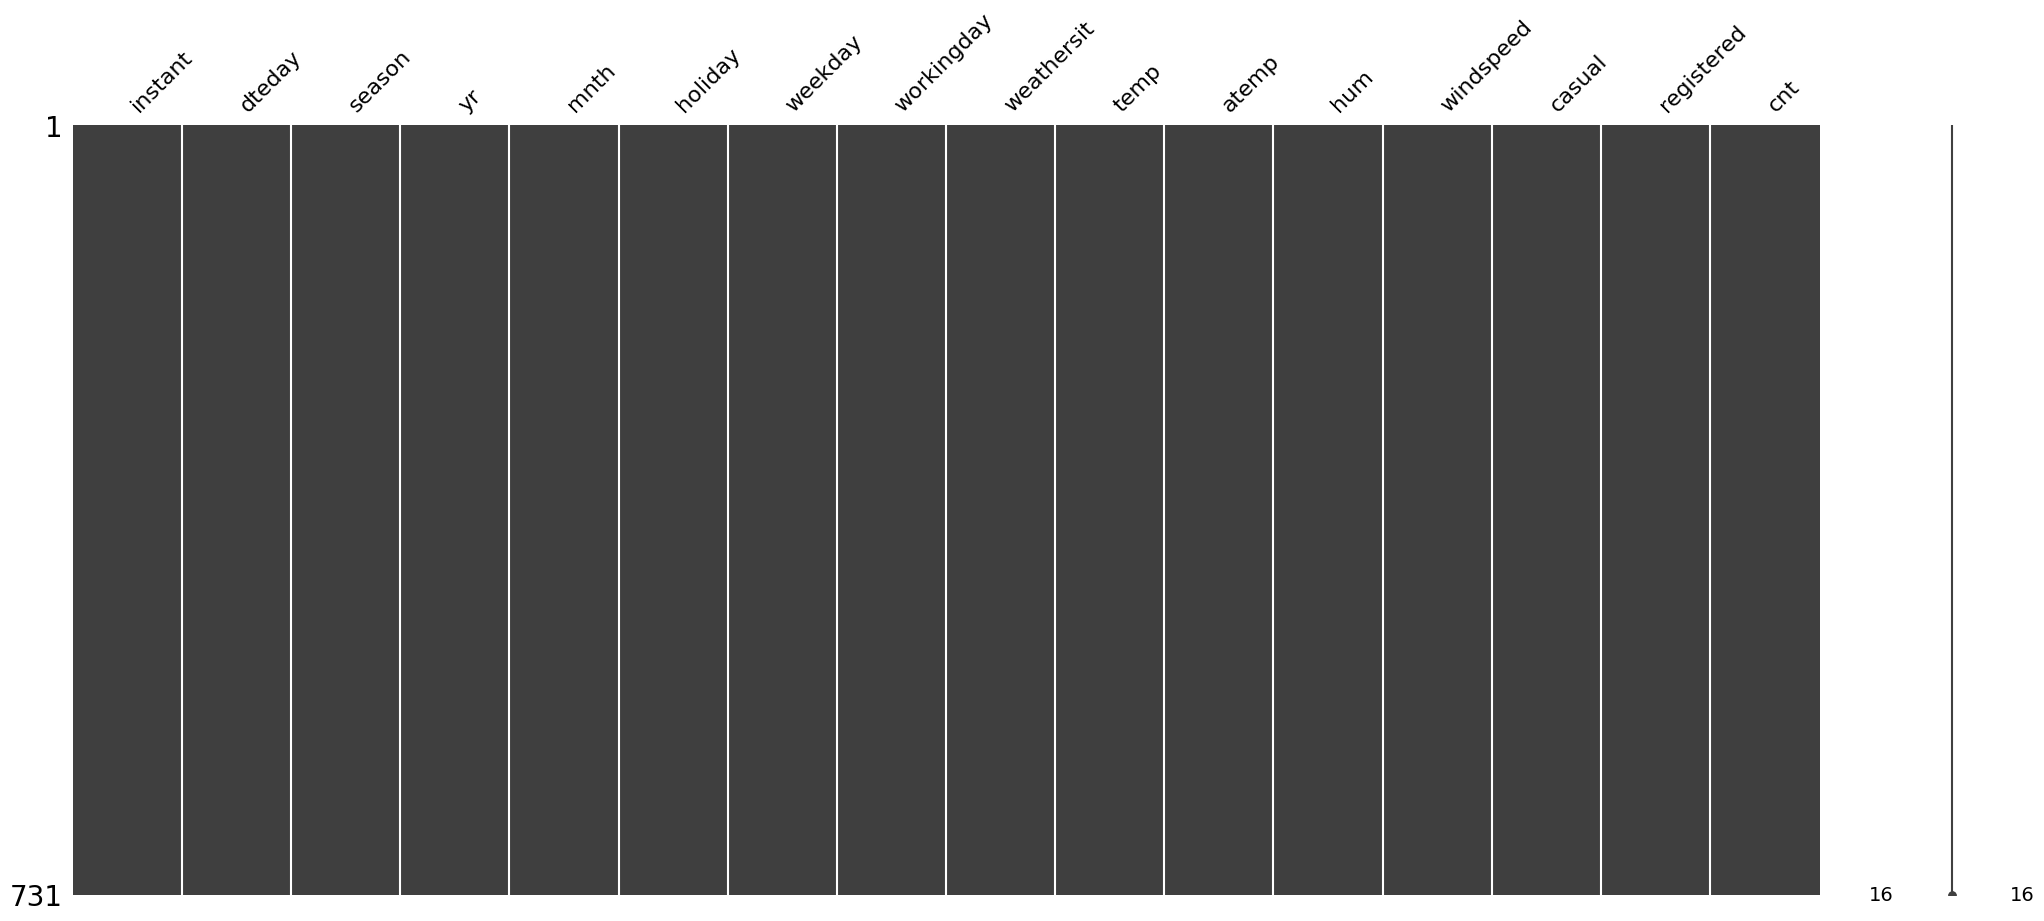

In [ ]:

# Análise de dados faltantes
print("Dados faltantes por coluna:")
print(df_day.isnull().sum())

# Visualização (caso haja)
import missingno as msno
msno.matrix(df_day)
plt.show()


## Histograma da variável alvo


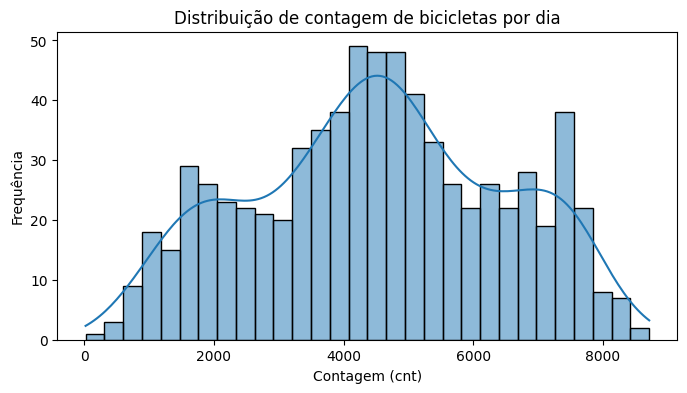

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_day['cnt'], bins=30, kde=True)
plt.title('Distribuição de contagem de bicicletas por dia')
plt.xlabel('Contagem (cnt)')
plt.ylabel('Frequência')
plt.show()

In [ ]:

# Feature Engineering
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day['month'] = df_day['dteday'].dt.month
df_day['day_of_week'] = df_day['dteday'].dt.dayofweek
df_day['year'] = df_day['dteday'].dt.year
df_day['is_weekend'] = df_day['weekday'].apply(lambda x: 1 if x in [0,6] else 0)
df_day['temp_hum_interaction'] = df_day['temp'] * df_day['hum']


## # Matriz de correlação


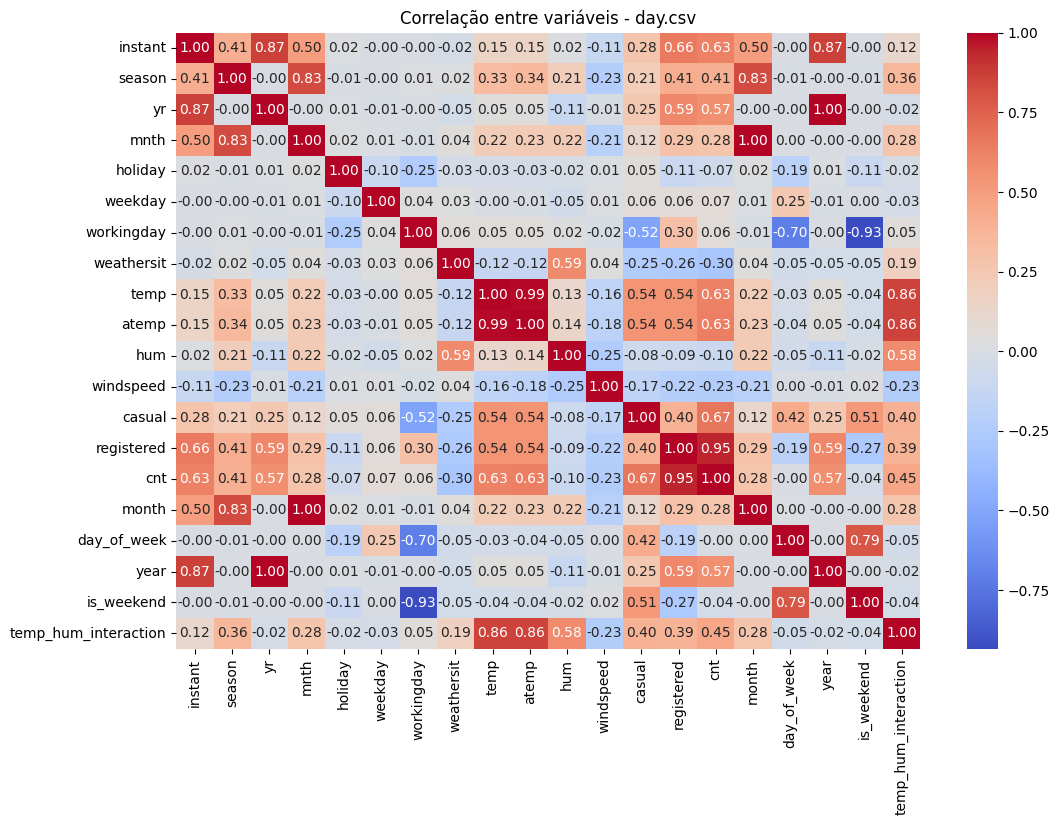

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_day.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlação entre variáveis - day.csv')
plt.show()

## Casual x Registrado


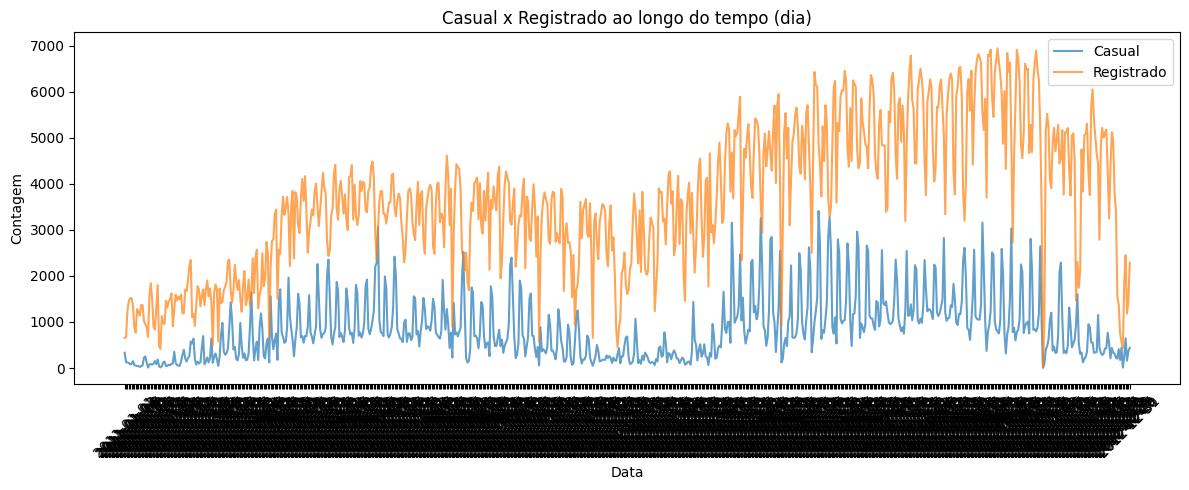

In [ ]:
df_day_original = pd.read_csv('day.csv')  # Recarrega para ter casual/registered

plt.figure(figsize=(12, 5))
plt.plot(df_day_original['dteday'], df_day_original['casual'], label='Casual', alpha=0.7)
plt.plot(df_day_original['dteday'], df_day_original['registered'], label='Registrado', alpha=0.7)
plt.title('Casual x Registrado ao longo do tempo (dia)')
plt.xlabel('Data')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Média de aluguel por condição climática


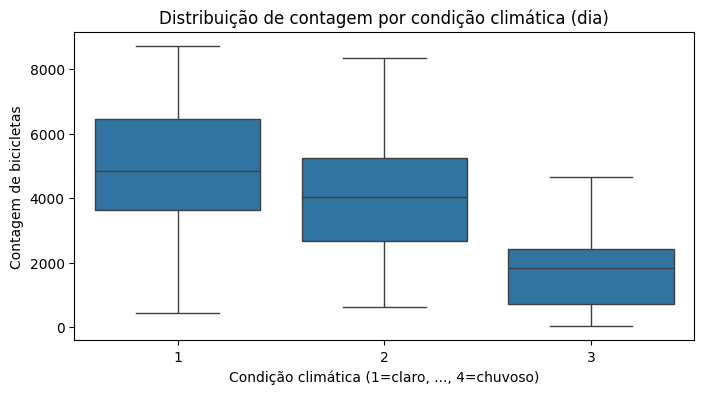

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='weathersit', y='cnt', data=df_day_original)
plt.title('Distribuição de contagem por condição climática (dia)')
plt.xlabel('Condição climática (1=claro, ..., 4=chuvoso)')
plt.ylabel('Contagem de bicicletas')
plt.show()


## Estação do ano vs Contagem


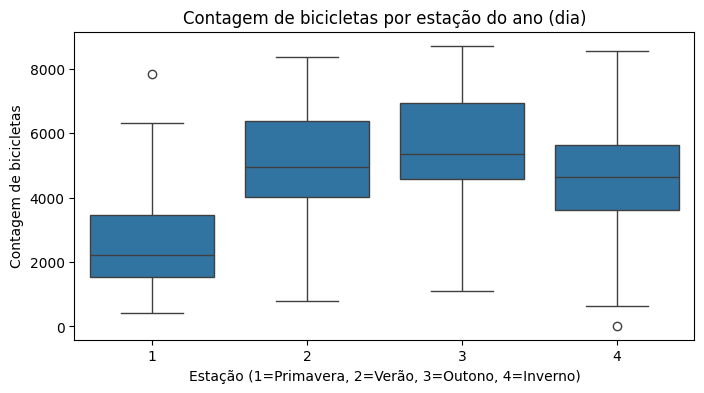

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='season', y='cnt', data=df_day_original)
plt.title('Contagem de bicicletas por estação do ano (dia)')
plt.xlabel('Estação (1=Primavera, 2=Verão, 3=Outono, 4=Inverno)')
plt.ylabel('Contagem de bicicletas')
plt.show()


## Fim de semana vs Dia útil


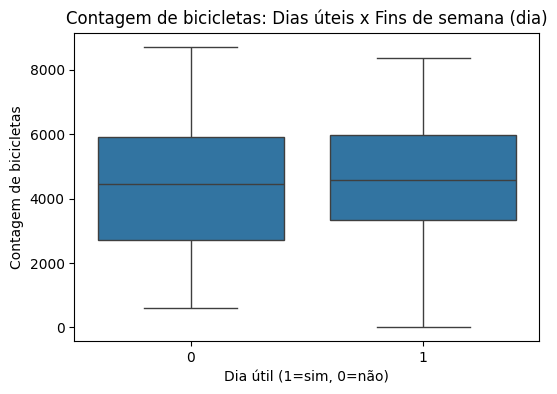

In [ ]:
# Mapear fim de semana (0) vs útil (1)
plt.figure(figsize=(6, 4))
sns.boxplot(x='workingday', y='cnt', data=df_day_original)
plt.title('Contagem de bicicletas: Dias úteis x Fins de semana (dia)')
plt.xlabel('Dia útil (1=sim, 0=não)')
plt.ylabel('Contagem de bicicletas')
plt.show()


#Pré-processamento


In [ ]:
#Importação de bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar os dados
df_day = pd.read_csv('day.csv')

# Remover colunas desnecessárias
df_day = df_day.drop(columns=['instant', 'dteday', 'casual', 'registered'])

In [ ]:
# Transformar variáveis categóricas em dummies
df_day = pd.get_dummies(df_day, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)

# Separar atributos e variável alvo
X_day = df_day.drop('cnt', axis=1)
y_day = df_day['cnt']

In [ ]:
# Padronização
scaler_day = StandardScaler()
X_day_scaled = scaler_day.fit_transform(X_day)

In [ ]:
# Divisão treino/teste
X_day_train, X_day_test, y_day_train, y_day_test = train_test_split(X_day_scaled, y_day, test_size=0.2, random_state=42)

# Pré-processamento com Pipeline

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Carregar os dados novamente para incluir as colunas de feature engineering
df_day = pd.read_csv('day.csv')

# Feature Engineering (re-applying from cell d6759706)
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day['month'] = df_day['dteday'].dt.month
df_day['day_of_week'] = df_day['dteday'].dt.dayofweek
df_day['year'] = df_day['dteday'].dt.year
df_day['is_weekend'] = df_day['weekday'].apply(lambda x: 1 if x in [0,6] else 0)
df_day['temp_hum_interaction'] = df_day['temp'] * df_day['hum']


# Remover colunas desnecessárias (re-applying from cell w4FPgsuHu3dw)
df_day = df_day.drop(columns=['instant', 'dteday', 'casual', 'registered'])


# Separar features e target
X = df_day.drop(columns=['cnt'])
y = df_day['cnt']

# Listar colunas
categorical_features = ['season', 'yr', 'mnth', 'weekday', 'weathersit', 'year', 'day_of_week']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Pipelines individuais
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Pipeline completo
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

X_processed = preprocessor.fit_transform(X)

# Divisão estratificada baseada no ano e estação
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y,
    test_size=0.3,
    stratify=df_day[['season', 'yr']],
    random_state=42
)


# Construção e Avaliação do Pipeline Completo do Modelo

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# Definir o Modelo de Regressão (Usaremos a Regressão Linear)
regressor = LinearRegression()

X_train_raw_new, X_test_raw_new, y_train_new, y_test_new = train_test_split(
    X, y,
    test_size=0.3,
    stratify=df_day[['season', 'yr']],
    random_state=42
)

print("\nDivisão treino/teste refeita com dados brutos para o pipeline completo.")


Divisão treino/teste refeita com dados brutos para o pipeline completo.


# Treinar o Pipeline Completo


In [ ]:
#Treinar o Pipeline Completo

print("\n--- Treinando o Pipeline Completo do Modelo... ---")
full_model_pipeline.fit(X_train_raw_new, y_train_new)
print("Pipeline completo do modelo treinado com sucesso!")


--- Treinando o Pipeline Completo do Modelo... ---
Pipeline completo do modelo treinado com sucesso!


#Validação Cruzada com o Pipeline Completo do Modelo

In [ ]:
from sklearn.model_selection import cross_val_score
print("\n--- Realizando Validação Cruzada com o Pipeline Completo ---")

scores_mse = cross_val_score(full_model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores_cv = np.sqrt(-scores_mse)

scores_r2 = cross_val_score(full_model_pipeline, X, y, cv=5, scoring='r2', n_jobs=-1)

print("\nResultados da Validação Cruzada (5 folds):")
print(f"RMSE por fold: {rmse_scores_cv}")
print(f"RMSE médio: {rmse_scores_cv.mean():.2f}")
print(f"Desvio padrão do RMSE: {rmse_scores_cv.std():.2f}")

print(f"\nR2 por fold: {scores_r2}")
print(f"R2 médio: {scores_r2.mean():.2f}")
print(f"Desvio padrão do R2: {scores_r2.std():.2f}")


--- Realizando Validação Cruzada com o Pipeline Completo ---

Resultados da Validação Cruzada (5 folds):
RMSE por fold: [ 696.23190098  929.23398228  846.65953317 1034.85348007 1102.43768816]
RMSE médio: 921.88
Desvio padrão do RMSE: 142.82

R2 por fold: [ 0.70213629 -0.33478126  0.29590265  0.12743236  0.65523687]
R2 médio: 0.29
Desvio padrão do R2: 0.38


#Fazer Previsões no Conjunto de Teste

In [ ]:
y_pred = full_model_pipeline.predict(X_test_raw_new)

#Avaliar o Desempenho do Modelo

In [ ]:
print(f"\n--- Avaliação do Desempenho do Modelo ({type(regressor).__name__}) ---")
mse = mean_squared_error(y_test_new, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_new, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


--- Avaliação do Desempenho do Modelo (LinearRegression) ---
Mean Squared Error (MSE): 728988.18
Root Mean Squared Error (RMSE): 853.81
R-squared (R2): 0.81


#Salvar o Pipeline Completo do Modelo

In [ ]:
joblib.dump(full_model_pipeline, 'bike_sharing_model_pipeline.pkl')
print("\n--- Pipeline Completo do Modelo Salvo ---")
print("Pipeline salvo como 'bike_sharing_model_pipeline.pkl'.")


--- Pipeline Completo do Modelo Salvo ---
Pipeline salvo como 'bike_sharing_model_pipeline.pkl'.
